In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
sns.set_style("whitegrid")

In [33]:
data = pd.read_csv('Housing1.csv')
print(data.shape)

(545, 5)


In [34]:
data.head()

,area,bedrooms,stories,bathrooms,price
0,7420,4,3,2,13300000
1,8960,4,4,4,12250000
2,9960,3,2,2,12250000
3,7500,4,2,2,12215000
4,7420,4,2,1,11410000


In [35]:
data.describe()

,area,bedrooms,stories,bathrooms,price
count,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,5150.541284,2.965138,1.805505,1.286239,4.766729e+06
std,2170.141023,0.738064,0.867492,0.502470,1.870440e+06
min,1650.000000,1.000000,1.000000,1.000000,1.750000e+06
25%,3600.000000,2.000000,1.000000,1.000000,3.430000e+06
50%,4600.000000,3.000000,2.000000,1.000000,4.340000e+06
75%,6360.000000,3.000000,2.000000,2.000000,5.740000e+06
max,16200.000000,6.000000,4.000000,4.000000,1.330000e+07


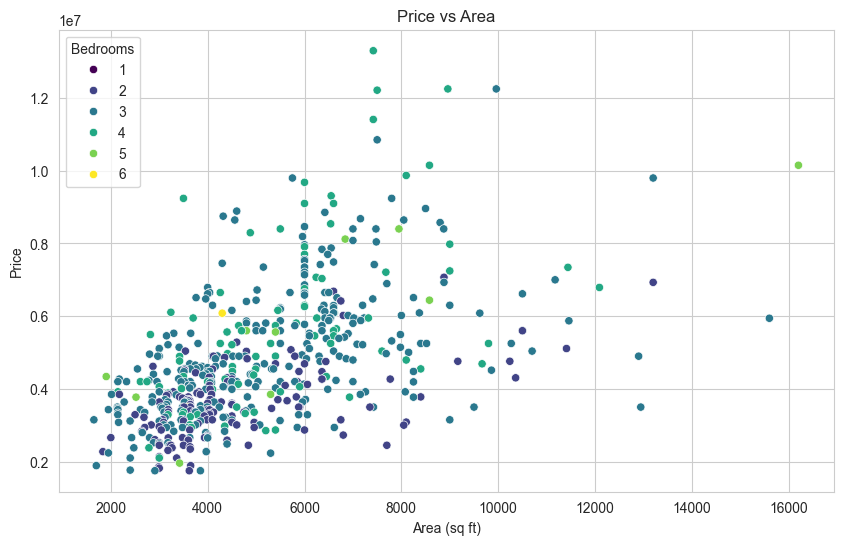

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', data=data, hue='bedrooms', palette='viridis')
plt.title('Price vs Area')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.legend(title='Bedrooms')
plt.show()

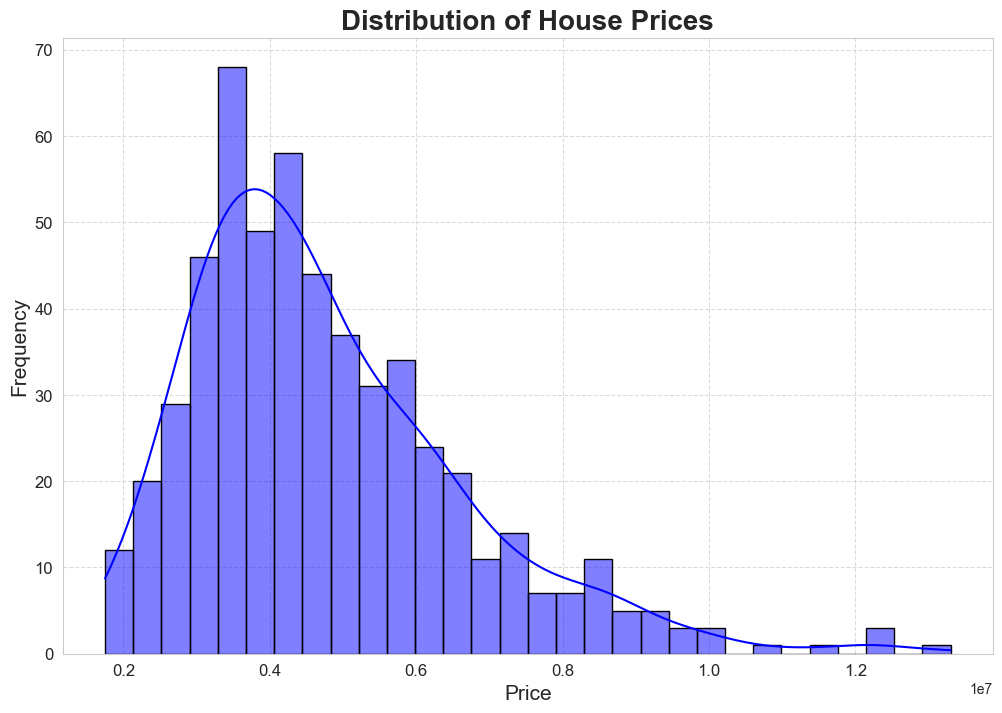

In [37]:
plt.figure(figsize=(12, 8))
sns.histplot(data['price'], bins=30, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of House Prices', fontsize=20, weight='bold')
plt.xlabel('Price', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_35604\666606129.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bedrooms', data=data, palette='viridis')


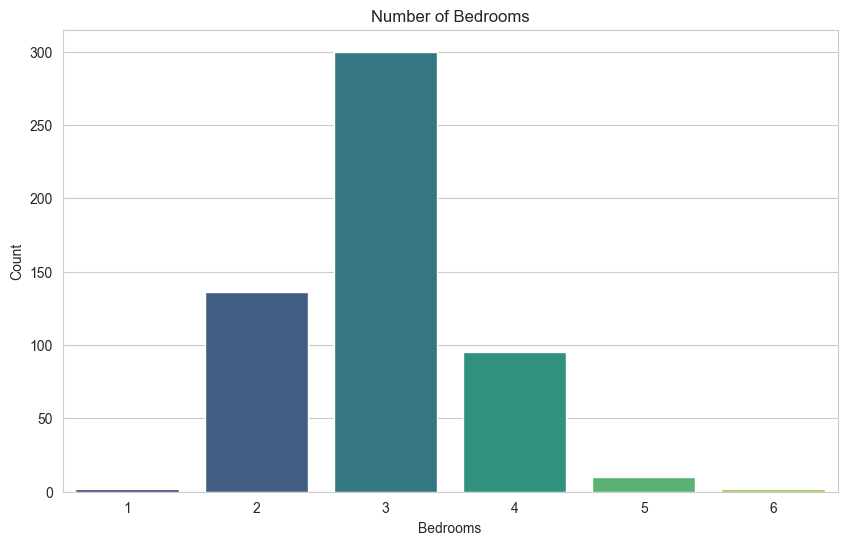

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(x='bedrooms', data=data, palette='viridis')
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.show()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_35604\3526988634.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bathrooms', data=data, palette='viridis')


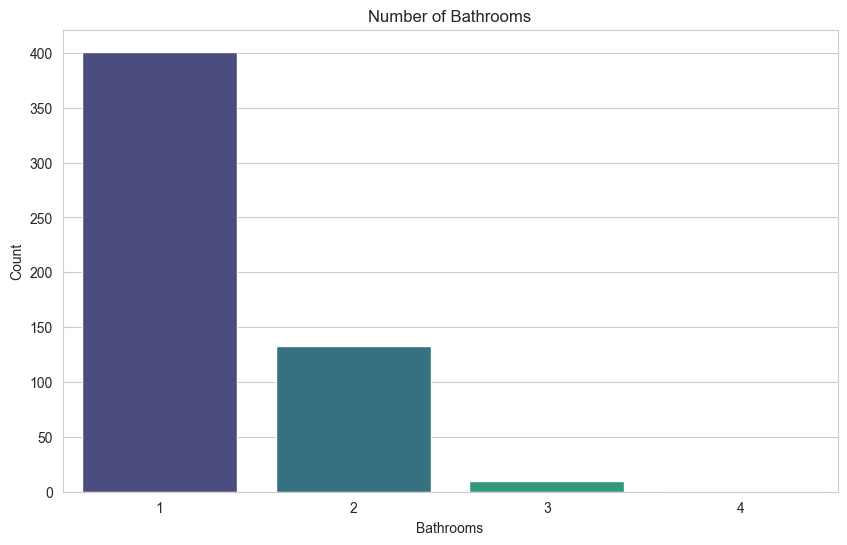

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(x='bathrooms', data=data, palette='viridis')
plt.title('Number of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Count')
plt.show()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_35604\1439906825.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stories', data=data, palette='viridis')


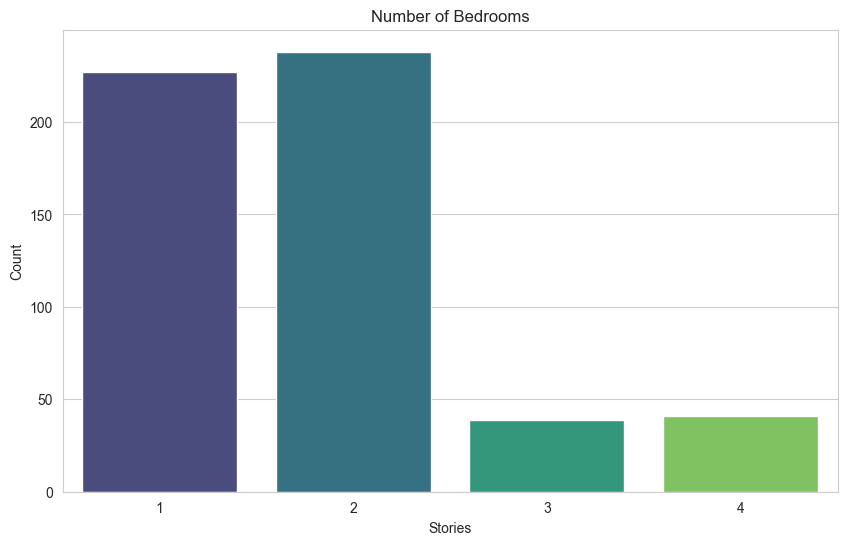

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(x='stories', data=data, palette='viridis')
plt.title('Number of Bedrooms')
plt.xlabel('Stories')
plt.ylabel('Count')
plt.show()

In [41]:
X = data[['area', 'bedrooms', 'stories', 'bathrooms']]  #independent
y = data['price']  #dependent

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [44]:
y_pred_gb = gb_model.predict(X_test)

In [45]:
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

In [46]:
print(f"Gradient Boosting - Mean Squared Error: {mse_gb}")
print(f"Gradient Boosting - R-Squared: {r2_gb}")

Gradient Boosting - Mean Squared Error: 2760444242310.7266
Gradient Boosting - R-Squared: 0.45387162354726807


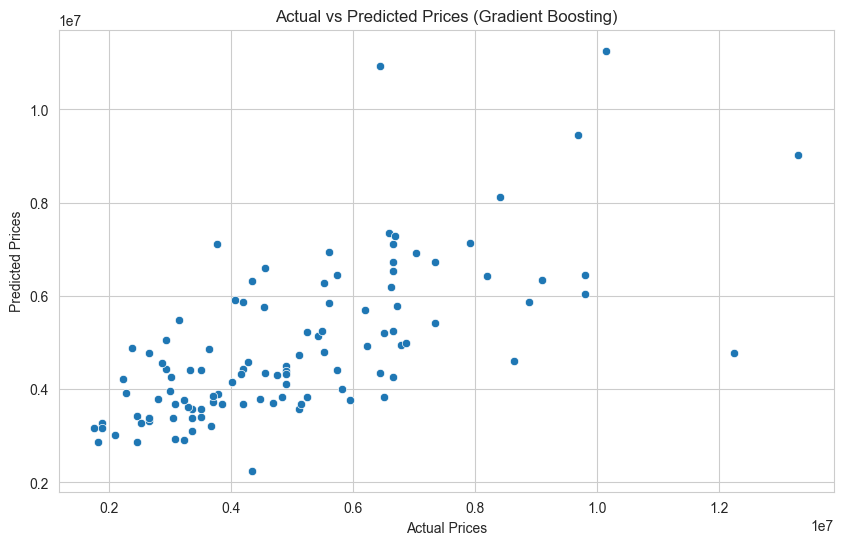

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_gb)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Gradient Boosting)')
plt.show()

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Best Gradient Boosting - Mean Squared Error: 2695042224044.668
Best Gradient Boosting - R-Squared: 0.46681080830054367


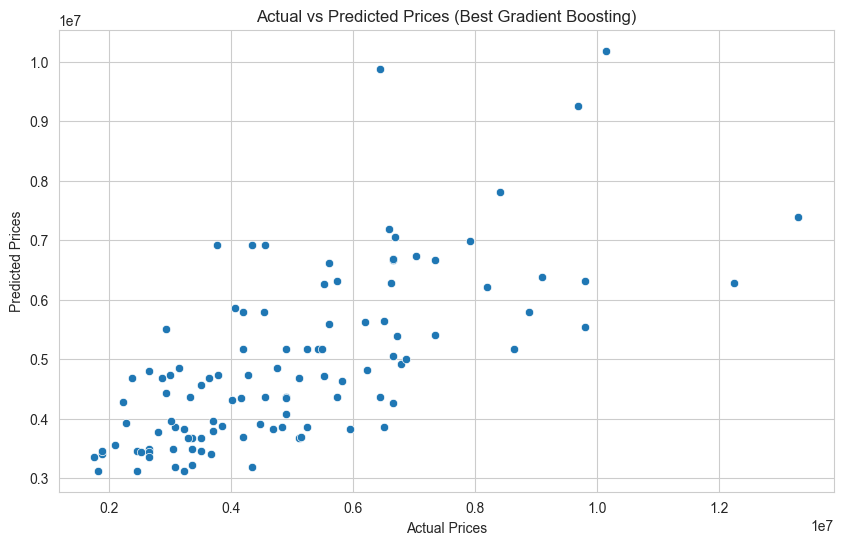

In [48]:
param_grid = {
    'n_estimators': [100, 200, 300],          
    'learning_rate': [0.01, 0.05, 0.1],       
    'max_depth': [3, 4, 5]                    
}

gb = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='r2')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

best_gb = grid_search.best_estimator_
y_pred_best_gb = best_gb.predict(X_test)

mse_best_gb = mean_squared_error(y_test, y_pred_best_gb)
r2_best_gb = r2_score(y_test, y_pred_best_gb)

print(f"Best Gradient Boosting - Mean Squared Error: {mse_best_gb}")
print(f"Best Gradient Boosting - R-Squared: {r2_best_gb}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_best_gb)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Best Gradient Boosting)')
plt.show()

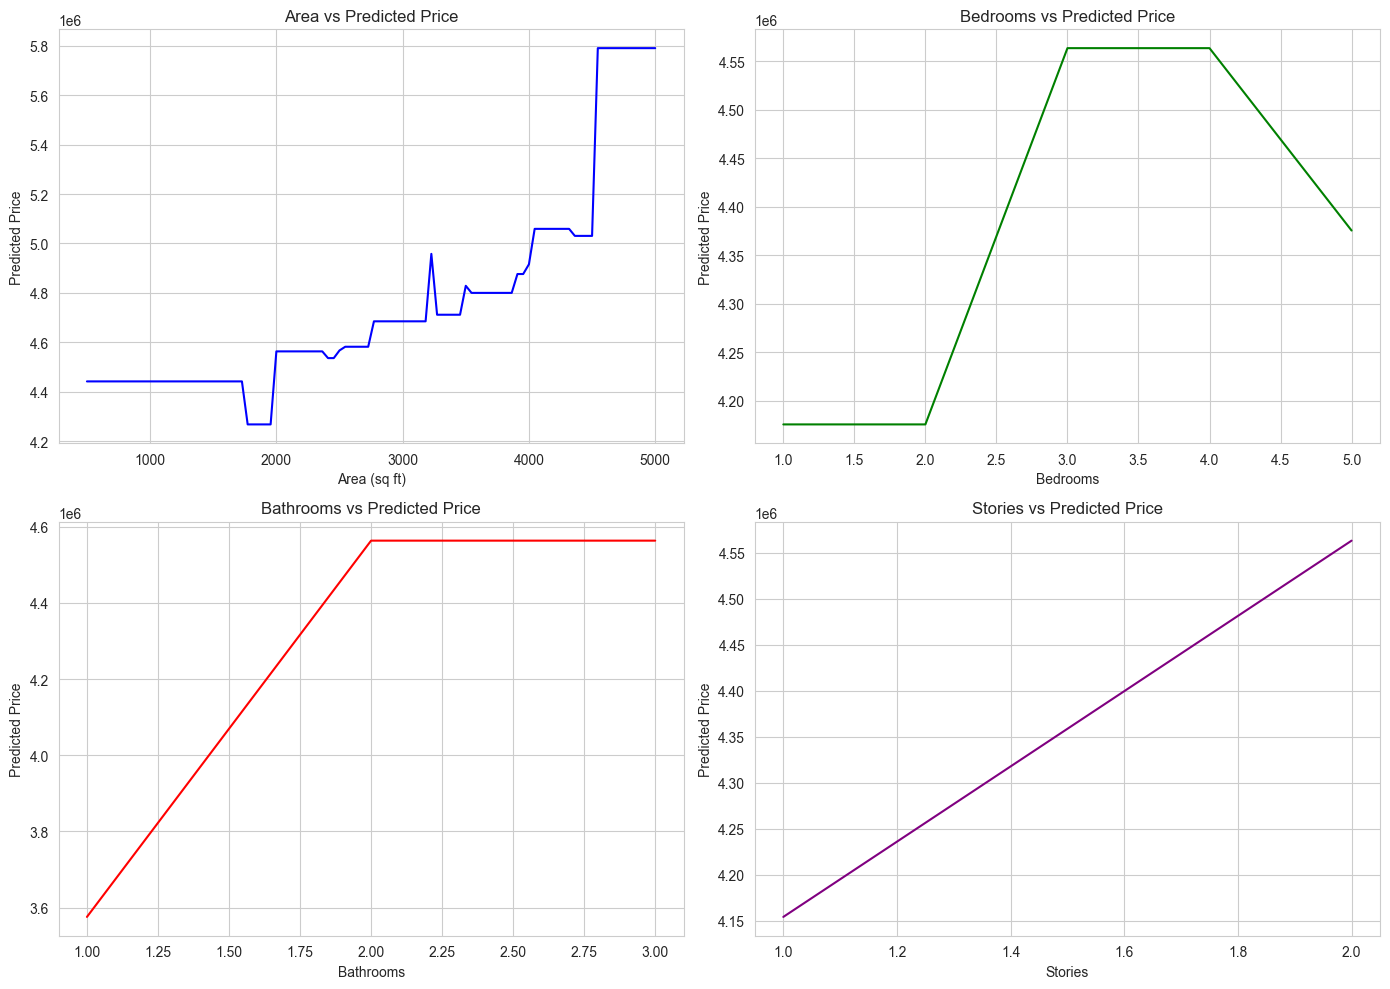

In [49]:
import numpy as np
import matplotlib.pyplot as plt

def predict_house_price(area, bedrooms, bathrooms, stories):
    input_data = pd.DataFrame({
        'area': [area],
        'bedrooms': [bedrooms],
        'stories': [stories],
        'bathrooms': [bathrooms]
    })
    
    predicted_price = best_gb.predict(input_data)[0]
    return predicted_price

area_range = np.linspace(500, 5000, 100)
bedrooms_range = np.arange(1, 6)
bathrooms_range = np.arange(1, 4)
stories_range = np.arange(1, 3)

constant_area = 2000
constant_bedrooms = 3
constant_bathrooms = 2
constant_stories = 2

predicted_prices_area = [predict_house_price(area, constant_bedrooms, constant_bathrooms, constant_stories) for area in area_range]
predicted_prices_bedrooms = [predict_house_price(constant_area, bedrooms, constant_bathrooms, constant_stories) for bedrooms in bedrooms_range]
predicted_prices_bathrooms = [predict_house_price(constant_area, constant_bedrooms, bathrooms, constant_stories) for bathrooms in bathrooms_range]
predicted_prices_stories = [predict_house_price(constant_area, constant_bedrooms, constant_bathrooms, stories) for stories in stories_range]

plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(area_range, predicted_prices_area, color='blue')
plt.xlabel('Area (sq ft)')
plt.ylabel('Predicted Price')
plt.title('Area vs Predicted Price')

plt.subplot(2, 2, 2)
plt.plot(bedrooms_range, predicted_prices_bedrooms, color='green')
plt.xlabel('Bedrooms')
plt.ylabel('Predicted Price')
plt.title('Bedrooms vs Predicted Price')

plt.subplot(2, 2, 3)
plt.plot(bathrooms_range, predicted_prices_bathrooms, color='red')
plt.xlabel('Bathrooms')
plt.ylabel('Predicted Price')
plt.title('Bathrooms vs Predicted Price')

plt.subplot(2, 2, 4)
plt.plot(stories_range, predicted_prices_stories, color='purple')
plt.xlabel('Stories')
plt.ylabel('Predicted Price')
plt.title('Stories vs Predicted Price')

plt.tight_layout()
plt.show()


In [50]:
def predict_house_price(area, bedrooms, bathrooms, stories):
    input_data = pd.DataFrame({
        'area': [area],
        'bedrooms': [bedrooms],
        'stories': [stories],
        'bathrooms': [bathrooms]
    })
    
    predicted_price = best_gb.predict(input_data)[0]
    
    return predicted_price

area = float(input("Enter the area of the house (in square feet): "))
bedrooms = int(input("Enter the number of bedrooms: "))
bathrooms = int(input("Enter the number of bathrooms: "))
stories = int(input("Enter the number of stories: "))

predicted_price = predict_house_price(area, bedrooms, bathrooms, stories)
print(f"\nThe predicted price of the house is: ${predicted_price:.2f}")

Enter the area of the house (in square feet):  4000
Enter the number of bedrooms:  4
Enter the number of bathrooms:  4
Enter the number of stories:  2



The predicted price of the house is: $4915819.92
